## Car Price Prediction ML Models

### Importing Required Libraries

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

In [57]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

def null_values(df):
    percent = df.isnull().sum()*100/df.shape[0]
    total = df.isnull().sum()
    return pd.DataFrame(list(zip(total,percent)), columns = ["Total","Percent"],index=df.columns)

### Exploratory Data Analysis

In [16]:
df = pd.read_csv('cleaned_autos.csv')

In [17]:
df.head()

,price,km,prev_owner,Cylinders,Gears,BT_Compact,BT_Convertible,BT_Coupe,BT_Off-Road,BT_Sedans,BT_Station wagon,BT_Transporter,BT_Van,CC_Air conditioning,CC_Air suspension,CC_Armrest,CC_Automatic climate control,CC_Auxiliary heating,CC_Cruise control,CC_Electric Starter,CC_Electric tailgate,CC_Electrical side mirrors,CC_Electrically adjustable seats,CC_Electrically heated windshield,CC_Heads-up display,CC_Heated steering wheel,CC_Hill Holder,CC_Keyless central door lock,CC_Leather seats,CC_Leather steering wheel,CC_Light sensor,CC_Lumbar support,CC_Massage seats,CC_Multi-function steering wheel,CC_Navigation system,CC_Panorama roof,CC_Park Distance Control,CC_Parking assist system camera,CC_Parking assist system self-steering,CC_Parking assist system sensors front,CC_Parking assist system sensors rear,CC_Power windows,CC_Rain sensor,CC_Seat heating,CC_Seat ventilation,CC_Split rear seats,CC_Start-stop system,CC_Sunroof,CC_Tinted windows,CC_Wind deflector,CC_Windshield,EM_Bluetooth,EM_CD player,EM_Digital radio,EM_Hands-free equipment,EM_MP3,EM_On-board computer,EM_Radio,EM_Sound system,EM_Television,EM_USB,EXT_Alloy wheels,EXT_Cab or rented Car,EXT_Catalytic Converter,EXT_Handicapped enabled,EXT_Right hand drive,EXT_Roof rack,EXT_Shift paddles,EXT_Ski bag,EXT_Sliding door,EXT_Sport package,EXT_Sport seats,EXT_Sport suspension,EXT_Touch screen,EXT_Trailer hitch,EXT_Tuned car,EXT_Voice Control,EXT_Winter tyres,SS_ABS,SS_Adaptive Cruise Control,SS_Adaptive headlights,SS_Alarm system,SS_Blind spot monitor,SS_Central door lock,SS_Central door lock with remote control,SS_Daytime running lights,SS_Driver drowsiness detection,SS_Driver-side airbag,SS_Electronic stability control,SS_Emergency brake assistant,SS_Emergency system,SS_Fog lights,SS_Head airbag,SS_Immobilizer,SS_Isofix,SS_LED Daytime Running Lights,SS_LED Headlights,SS_Lane departure warning system,SS_Night view assist,SS_Passenger-side airbag,SS_Power steering,SS_Rear airbag,SS_Side airbag,SS_Tire pressure monitoring system,SS_Traction control,SS_Traffic sign recognition,SS_Xenon headlights,consumption_comb,GT_Automatic,GT_Manual,GT_Semi-automatic,DC_4WD,DC_front,DC_rear,BC_Beige,BC_Black,BC_Blue,BC_Bronze,BC_Brown,BC_Gold,BC_Green,BC_Grey,BC_Orange,BC_Red,BC_Silver,BC_Violet,BC_White,BC_Yellow,PT_Metallic,PT_Perl effect,PT_Uni/basic,co2_emission,auto_age,FT_Diesel,FT_Gasoline,FT_LPG,engine_cc,M_Audi,M_Opel,M_Renault,MOD_A1,MOD_A2,MOD_A3,MOD_Astra,MOD_Clio,MOD_Corsa,MOD_Duster,MOD_Espace,MOD_Insignia,num_of_doors,num_of_seats,TYP_Demonstration,TYP_Employee's car,TYP_New,TYP_Pre-registered,TYP_Used,horse_power
0,15770,56013.0,2,3.0,6.0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.8,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,99.0,4.0,1,0,0,1422.0,1,0,0,1,0,0,0,0,0,0,0,0,5,5,0,0,0,0,1,66
1,14500,80000.0,1,4.0,7.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,129.0,3.0,0,1,0,1798.0,1,0,0,1,0,0,0,0,0,0,0,0,3,4,0,0,0,0,1,141
2,14640,83450.0,1,3.0,6.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.8,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,99.0,4.0,1,0,0,1598.0,1,0,0,1,0,0,0,0,0,0,0,0,4,4,0,0,0,0,1,85
3,14500,73000.0,1,3.0,6.0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.8,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,99.0,4.0,1,0,0,1422.0,1,0,0,1,0,0,0,0,0,0,0,0,3,4,0,0,0,0,1,66
4,16790,16200.0,1

In [18]:
df.shape

(15915, 157)

In [19]:
null_values(df)

,Total,Percent
price,0,0.0
km,0,0.0
prev_owner,0,0.0
Cylinders,0,0.0
Gears,0,0.0
...,...,...
TYP_Employee's car,0,0.0
TYP_New,0,0.0
TYP_Pre-registered,0,0.0
TYP_Used,0,0.0


In [20]:
df.dtypes

price                   int64
km                    float64
prev_owner              int64
Cylinders             float64
Gears                 float64
                       ...   
TYP_Employee's car      int64
TYP_New                 int64
TYP_Pre-registered      int64
TYP_Used                int64
horse_power             int64
Length: 157, dtype: object

In [21]:
df.corr().round(2) 

,price,km,prev_owner,Cylinders,Gears,BT_Compact,BT_Convertible,BT_Coupe,BT_Off-Road,BT_Sedans,BT_Station wagon,BT_Transporter,BT_Van,CC_Air conditioning,CC_Air suspension,CC_Armrest,CC_Automatic climate control,CC_Auxiliary heating,CC_Cruise control,CC_Electric Starter,CC_Electric tailgate,CC_Electrical side mirrors,CC_Electrically adjustable seats,CC_Electrically heated windshield,CC_Heads-up display,CC_Heated steering wheel,CC_Hill Holder,CC_Keyless central door lock,CC_Leather seats,CC_Leather steering wheel,CC_Light sensor,CC_Lumbar support,CC_Massage seats,CC_Multi-function steering wheel,CC_Navigation system,CC_Panorama roof,CC_Park Distance Control,CC_Parking assist system camera,CC_Parking assist system self-steering,CC_Parking assist system sensors front,CC_Parking assist system sensors rear,CC_Power windows,CC_Rain sensor,CC_Seat heating,CC_Seat ventilation,CC_Split rear seats,CC_Start-stop system,CC_Sunroof,CC_Tinted windows,CC_Wind deflector,CC_Windshield,EM_Bluetooth,EM_CD player,EM_Digital radio,EM_Hands-free equipment,EM_MP3,EM_On-board computer,EM_Radio,EM_Sound system,EM_Television,EM_USB,EXT_Alloy wheels,EXT_Cab or rented Car,EXT_Catalytic Converter,EXT_Handicapped enabled,EXT_Right hand drive,EXT_Roof rack,EXT_Shift paddles,EXT_Ski bag,EXT_Sliding door,EXT_Sport package,EXT_Sport seats,EXT_Sport suspension,EXT_Touch screen,EXT_Trailer hitch,EXT_Tuned car,EXT_Voice Control,EXT_Winter tyres,SS_ABS,SS_Adaptive Cruise Control,SS_Adaptive headlights,SS_Alarm system,SS_Blind spot monitor,SS_Central door lock,SS_Central door lock with remote control,SS_Daytime running lights,SS_Driver drowsiness detection,SS_Driver-side airbag,SS_Electronic stability control,SS_Emergency brake assistant,SS_Emergency system,SS_Fog lights,SS_Head airbag,SS_Immobilizer,SS_Isofix,SS_LED Daytime Running Lights,SS_LED Headlights,SS_Lane departure warning system,SS_Night view assist,SS_Passenger-side airbag,SS_Power steering,SS_Rear airbag,SS_Side airbag,SS_Tire pressure monitoring system,SS_Traction control,SS_Traffic sign recognition,SS_Xenon headlights,consumption_comb,GT_Automatic,GT_Manual,GT_Semi-automatic,DC_4WD,DC_front,DC_rear,BC_Beige,BC_Black,BC_Blue,BC_Bronze,BC_Brown,BC_Gold,BC_Green,BC_Grey,BC_Orange,BC_Red,BC_Silver,BC_Violet,BC_White,BC_Yellow,PT_Metallic,PT_Perl effect,PT_Uni/basic,co2_emission,auto_age,FT_Diesel,FT_Gasoline,FT_LPG,engine_cc,M_Audi,M_Opel,M_Renault,MOD_A1,MOD_A2,MOD_A3,MOD_Astra,MOD_Clio,MOD_Corsa,MOD_Duster,MOD_Espace,MOD_Insignia,num_of_doors,num_of_seats,TYP_Demonstration,TYP_Employee's car,TYP_New,TYP_Pre-registered,TYP_Used,horse_power
price,1.00,-0.40,-0.12,-0.03,0.54,-0.20,0.03,-0.02,-0.01,-0.04,0.04,-0.01,0.40,0.08,0.06,0.30,0.42,0.05,0.13,-0.01,0.28,0.01,0.26,0.12,0.33,0.15,0.02,0.27,0.03,0.23,0.31,0.22,0.28,0.14,0.34,0.24,0.38,0.33,0.28,0.34,0.31,-0.02,0.36,0.30,0.19,0.00,0.23,0.16,0.03,0.01,0.01,0.03,-0.08,0.25,0.08,-0.02,-0.08,0.01,0.15,0.03,-0.05,0.20,0.01,0.04,0.01,-0.01,0.04,0.14,0.03,0.02,0.11,0.13,0.16,0.13,0.02,0.02,0.14,-0.02,-0.04,0.25,0.22,0.05,0.38,-0.05,-0.07,0.00,0.09,0.01,0.01,0.34,0.06,-0.05,-0.04,0.06,-0.04,0.12,0.44,0.37,0.07,-0.00,-0.05,0.00,-0.01,0.03,0.06,0.35,0.18,0.29,0.39,-0.43,0.12,0.16,-0.15,-0.01,-0.01,0.08,-0.02,-0.00,0.01,NaN,-0.00,0.07,0.00,-0.08,-0.07,0.02,-0.05,0.05,0.01,-0.01,-0.01,0.02,-0.47,0.02,-0.02,-0.01,0.22,0.20,-0.21,0.01,0.05,0.01,0.20,-0.13,-0.30,-0.38,-0.03,0.42,0.21,0.16,0.25,0.24,0.01,0.27,0.11,-0.37,0.67
km,-0.40,1.00,0.09,0.18,-0.01,-0.12,-0.01,-0.00,-0.03,-0.04,0.17,0.04,-0.01,0.01,0.03,0.04,0.02,0.06,0.02,0.02,0.01,-0.06,0.13,-0.07,-0.04,-0.11,-0.09,-0.05,0.03,-0.06,-0.11,0.04,-0.04,-0.04,0.06,0.04,-0.09,-0.07,-0.03,-0.02,-0.06,-0.00,-0.09,-0.08,0.06,0.12,-0.02,0.05,0.06,0.03,0.01,-0.03,0.14,-0.05,-0.09,-0.04,0.08,-0.00,0.02,0.03,-0.05,-0.08,-0.02,-0.08,0.02,0.01,0.16,-0.02,0.02,-0.00,0.06,0.01,-0.01,-0.07,0.18,-0.00,-0.01,0.07,0.00,0.04,0.02,0.12,-0.01,-0.02,0.09,-0.08,0.05,-0.03,-0.10,-0.10,-0.01,0.05,0.11,-0.04,-0.03,-0.04,-0.10,-0.06,0.03,-0.

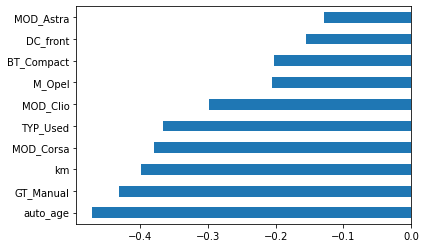

In [22]:
df.corr()["price"].sort_values().head(10).plot.barh();

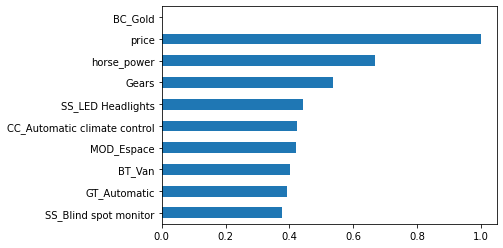

In [23]:
df.corr()["price"].sort_values().tail(10).plot.barh();

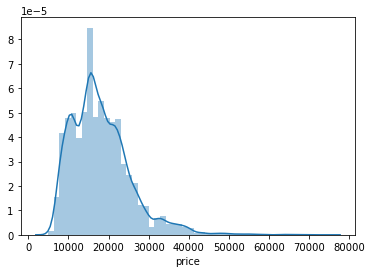

In [24]:
sns.distplot(df.price);

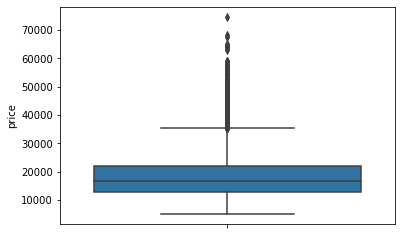

In [25]:
sns.boxplot(df.price, orient="v");

### Model Development

In [26]:
X=df.drop(["price"], axis=1)
y=df["price"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
print(X_train.shape)
print(X_test.shape)

(12732, 156)
(3183, 156)


**1.Linear Regression**

In [28]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=linear_reg.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8806397886907262 
 mae: 1762.8632525306855 
 mse: 6441581.812765502 
 rmse: 2538.0271497297863


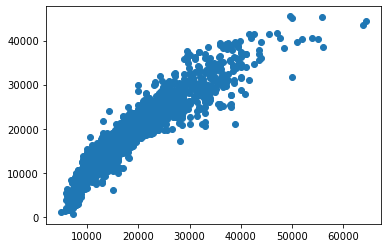

In [30]:
plt.scatter(y_test, y_pred);

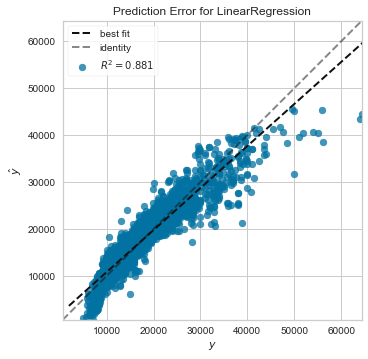

In [31]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(linear_reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

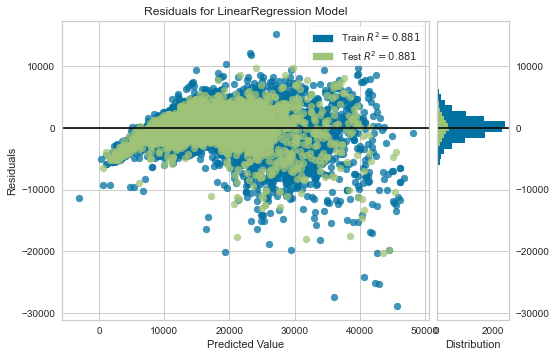

In [32]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(linear_reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

In [33]:
pred_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(pred_dict)
compare.head(10)

,Actual,Pred
12887,26379,24674.046868
8140,18990,20067.812536
6835,12490,12474.772014
15439,32975,36033.914808
1213,15888,15279.776190
13187,15480,14712.240303
1034,20500,22693.524067
2864,16760,16642.155955
7061,18990,17217.860220
14983,27000,25083.902553


In [34]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=linear_reg, X=X_train, y=y_train)
cv_scores.mean()

0.8759048081025942

**2.Ridge Regression**

***Standardization***

In [35]:
scaler =StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [37]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8806382226732594 
 mae: 1762.846066942398 
 mse: 6441666.326939214 
 rmse: 2538.0437992554844


***Accuracy Cross Validation***

In [38]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8760694904656514

***Model Optimization***

In [39]:
alphas = np.linspace(0.01, 500, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

102.0487755102041

***Model Tuning***

In [40]:
ridge_model = Ridge(alpha = ridge_cv.alpha_)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8807409396495969 
 mae: 1760.63342416337 
 mse: 6436122.940249628 
 rmse: 2536.951505301122


**3.Lasso Regression**

In [41]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [42]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8807613369524284 
 mae: 1761.5652450962548 
 mse: 6435022.147167008 
 rmse: 2536.734544087538


***Accuracy Cross Validation***

In [43]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.876151385261943

***Model Optimization:***
Finding the best alpha

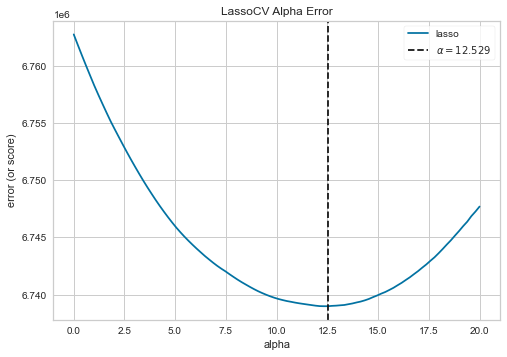

In [44]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show();

***Model Tuning***

In [45]:
lasso_model = Lasso(alpha=12.529)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8811237333195229 
 mae: 1751.8896637058428 
 mse: 6415464.49205161 
 rmse: 2532.876722632116


In [46]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8765739098480667

***Feature Importance***

In [47]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

122

In [48]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
155,horse_power,1758.044124
146,MOD_Espace,1365.826294
136,M_Audi,1216.942097
150,TYP_Demonstration,529.070339
141,MOD_A3,507.982798
...,...,...
108,GT_Manual,-800.636633
143,MOD_Clio,-991.670085
144,MOD_Corsa,-1121.270527
0,km,-1444.639750


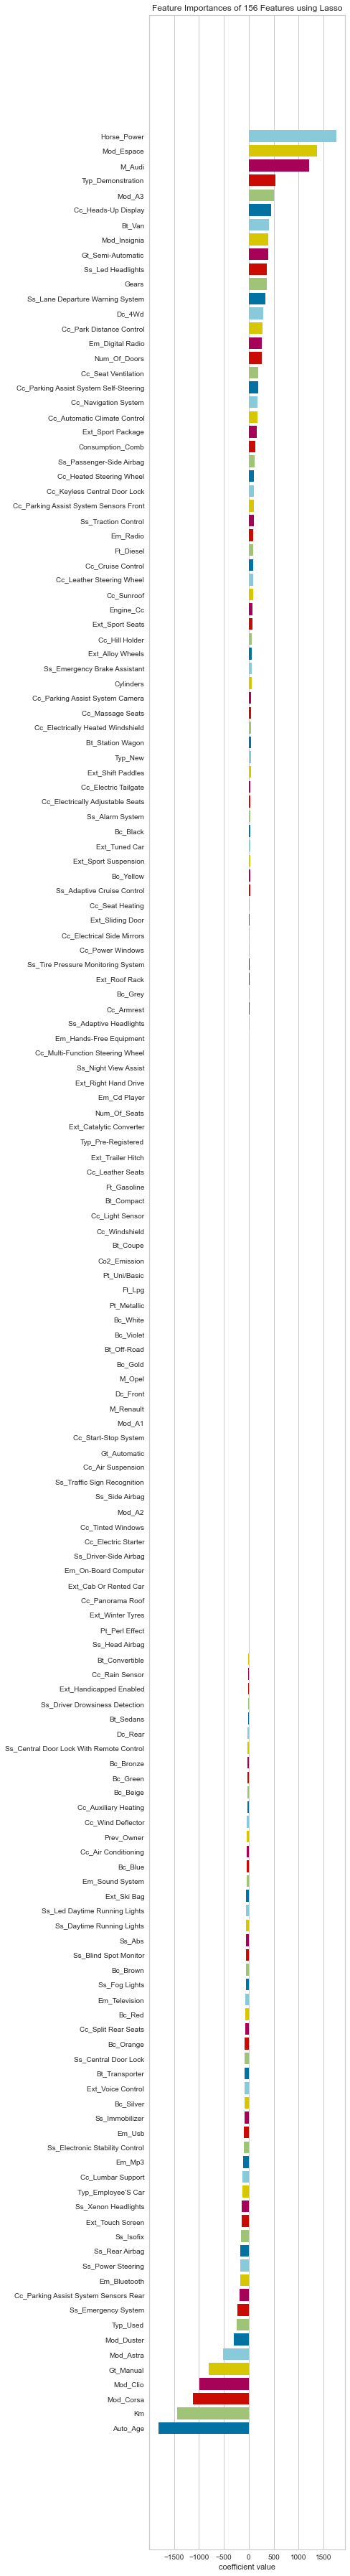

In [49]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show();

**4. ElasticNet Regression**

In [50]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [51]:
enet_model = ElasticNet()
enet_model.fit(X_train, y_train)
y_pred = enet_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8599955692247914 
 mae: 1841.089548031105 
 mse: 7555700.388728285 
 rmse: 2748.7634290219094


***Model Tuning***

In [52]:
l1_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=l1_ratios, cv = 10).fit(X_train, y_train)
print(lasso_cv_model.alpha_)
print(lasso_cv_model.l1_ratio_)

12.763636363636362
1.0


In [53]:
enet_model = ElasticNet(alpha = lasso_cv_model.alpha_, l1_ratio = lasso_cv_model.l1_ratio_ )
enet_model.fit(X_train, y_train)
y_pred = enet_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8811263057292944 
 mae: 1751.7180750889668 
 mse: 6415325.66532018 
 rmse: 2532.849317531578


In [54]:
accuraries = cross_val_score(estimator=enet_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.876574206522913

**5. KNN**

In [58]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8388272213706864 
 mae: 1691.6637763116555 
 mse: 8698104.905673893 
 rmse: 2949.2549746798586


***Accuracy Cross Validation***

In [59]:
accuraries = cross_val_score(estimator=knn_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.840588762056145

***Model Tuning***

In [62]:
knn_params = {"n_neighbors": np.arange(2,10,1)}
knn_model = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)
knn_cv_model.best_params_

{'n_neighbors': 5}

In [63]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8388272213706864 
 mae: 1691.6637763116555 
 mse: 8698104.905673893 
 rmse: 2949.2549746798586


**6.RANDOM FORESTS**

In [66]:
rf_model = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9562594559200662 
 mae: 855.9076640024477 
 mse: 2360571.333907126 
 rmse: 1536.4150916686303


***Accuracy Cross Validation***

In [67]:
accuraries = cross_val_score(estimator=rf_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.9522343034965889

***Model Tuning***

In [69]:
rf_params = {"max_depth": [5,10,None],
            "max_features": [2,5,10],
            "n_estimators": [200,500],
            "min_samples_split": [5,10,20]}
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
rf_cv_model.best_params_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  9.1min finished


{'max_depth': None,
 'max_features': 10,
 'min_samples_split': 5,
 'n_estimators': 500}

In [70]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9451338581830849 
 mae: 999.2027481390973 
 mse: 2960992.925428855 
 rmse: 1720.7535923045039


***Feature Importance***

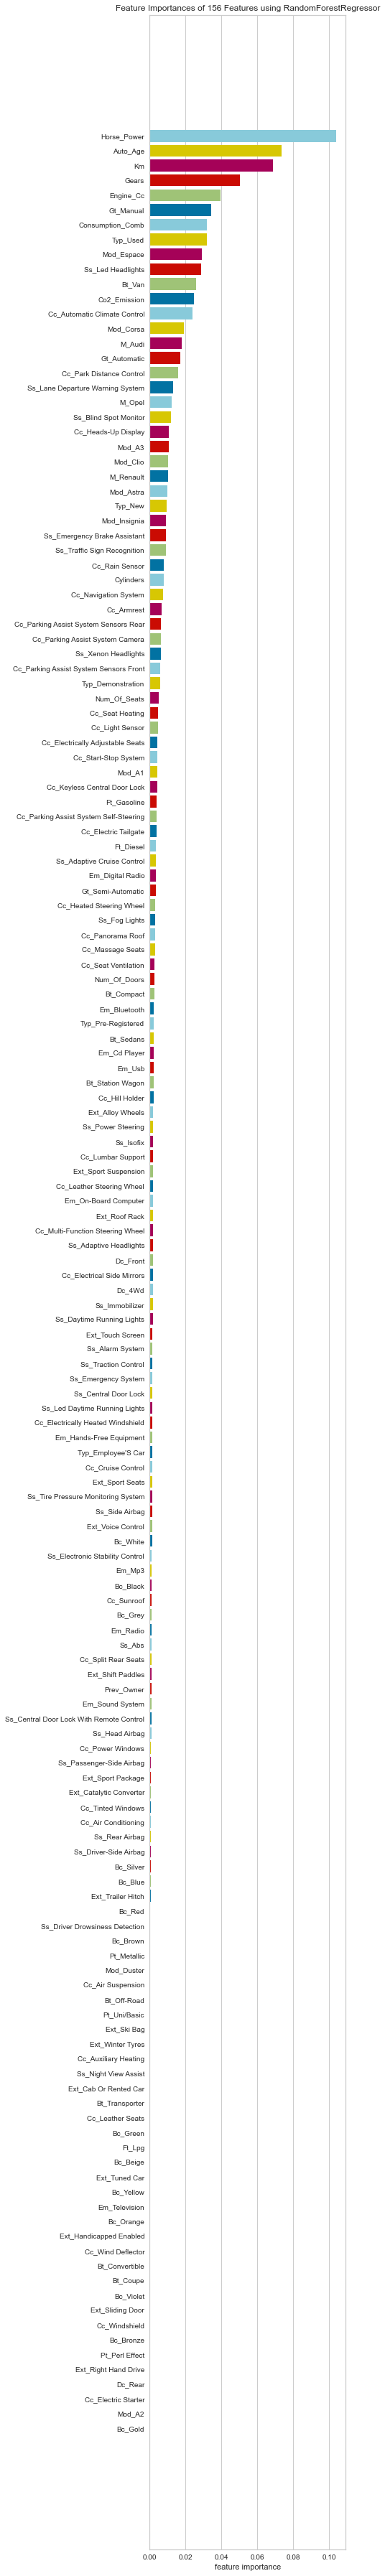

In [77]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(rf_tuned, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show();

**7. XGBoost**

In [74]:
import xgboost
from xgboost import XGBRegressor

In [75]:
xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9584317791923909 
 mae: 918.8295221930962 
 mse: 2243336.302828004 
 rmse: 1497.7771205449776


***Model Tuning***

In [78]:
xgb_params = {"learning_rate": [0.1,0.01],
             "max_depth": [2,4,8],
             "n_estimators": [200,500,1000],
             "colsample_bytree": [0.4,0.7]}
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
xgb_cv_model.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 13.6min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 1000}

In [79]:
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.964292928219285 
 mae: 798.539168194559 
 mse: 1927024.2708752234 
 rmse: 1388.1729974593309


***Feature Importance***

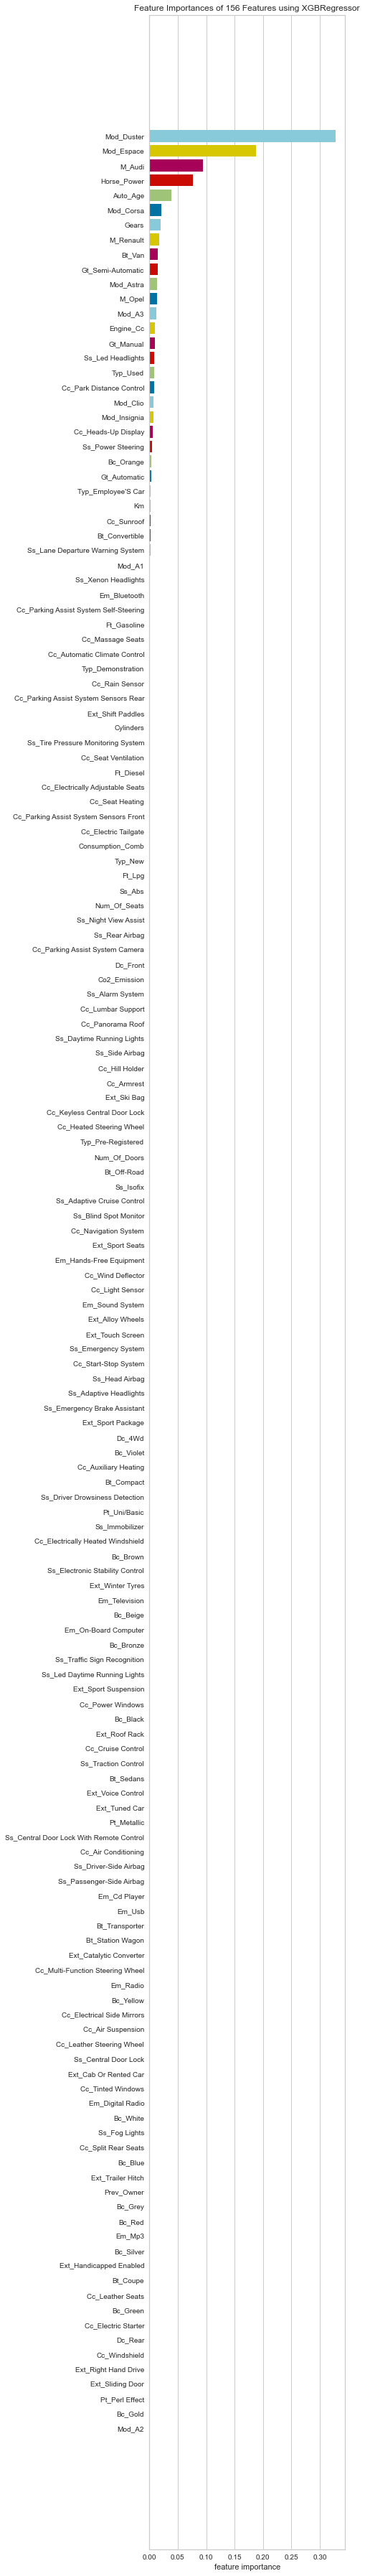

In [80]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(xgb_tuned, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))
viz.fit(X_train, y_train)
viz.show();

**Light GBM**

In [81]:
!pip install lightgbm
from lightgbm import LGBMRegressor

In [82]:
lgbm_model = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.956207124029126 
 mae: 984.6051793092729 
 mse: 2363395.559444352 
 rmse: 1537.3339127998029


***Model Tuning***

In [84]:
lgbm_params = {"learning_rate": [0.01,0.001,0.1],
              "n_estimators": [1000,2000],
              "max_depth": [2,4,6],
              "colsample_bytree": [0.8,0.4]}
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)
lgbm_cv_model.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  8.2min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 2000}

In [85]:
lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9639907753024431 
 mae: 858.4474221048733 
 mse: 1943330.7327393002 
 rmse: 1394.033978330263


***Feature Importance***

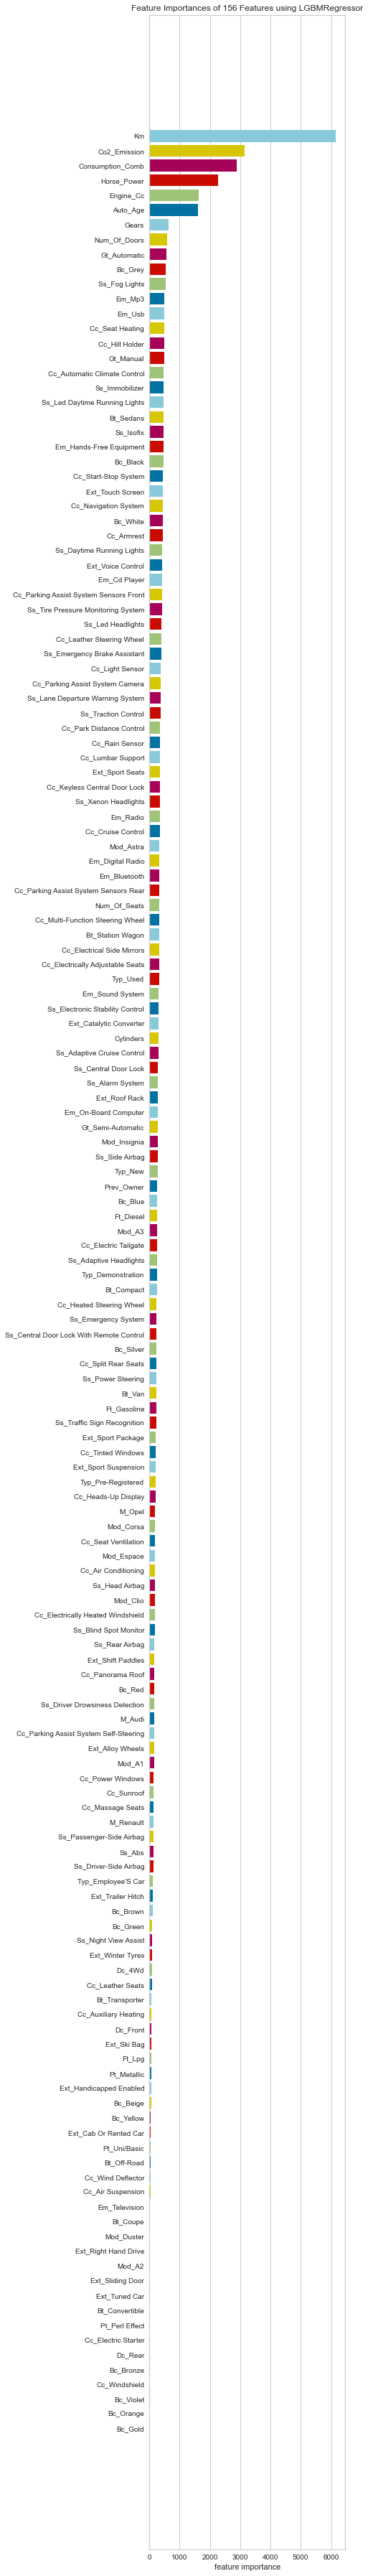

In [87]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lgbm_tuned, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))
viz.fit(X_train, y_train)
viz.show();

## Saving Sci-kit Learn Model

In [89]:
selected_features = ['auto_age', 'km', 'horse_power', 'co2_emission', 'consumption_comb', 'engine_cc', 'Gears', 'num_of_doors']
X = df[selected_features]
y = df['price']

In [90]:
X.head()

,auto_age,km,horse_power,co2_emission,consumption_comb,engine_cc,Gears,num_of_doors
0,4.0,56013.0,66,99.0,3.8,1422.0,6.0,5
1,3.0,80000.0,141,129.0,5.6,1798.0,7.0,3
2,4.0,83450.0,85,99.0,3.8,1598.0,6.0,4
3,4.0,73000.0,66,99.0,3.8,1422.0,6.0,3
4,4.0,16200.0,66,109.0,4.1,1422.0,6.0,5


In [91]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lgbm_model_new = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm_model_new.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9034323627329005 
 mae: 1413.1122902128388 
 mse: 5029300.743815014 
 rmse: 2242.610252320945


In [94]:
import pickle
pickle.dump(lgbm_model_new, open("saved_lgbm_model", 'wb'))

***Model Prediction***

In [95]:
lgbm_prediction=pickle.load(open("saved_lgbm_model", "rb"))

In [96]:
pred_dict = {
    "auto_age": 4,
    "km": 10000,
    "horse_power": 160,
    "co2_emission": 80,
    "consumption_comb": 5.5,
    "engine_cc": 1600,
    "Gears": 7,
    "num_of_doors": 5
    
            }
df_new = pd.DataFrame.from_dict([pred_dict])
df_new.head()

,auto_age,km,horse_power,co2_emission,consumption_comb,engine_cc,Gears,num_of_doors
0,4,10000,160,80,5.5,1600,7,5


In [97]:
columns=X.columns
df_new = pd.get_dummies(df_new).reindex(columns=columns, fill_value=0)
df_new.head()

,auto_age,km,horse_power,co2_emission,consumption_comb,engine_cc,Gears,num_of_doors
0,4,10000,160,80,5.5,1600,7,5


In [98]:
prediction=list(lgbm_prediction.predict(df_new))
prediction

[27235.79860323132]